In [1]:
# https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/image_annotated_heatmap.html
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta

In [32]:
%run -i ../utils/filter_option_chain.py
%run -i ./my_heatmap_plotter.py
%run -i ../utils/concat_dfs.py
# %who_ls

['add_z_score',
 'ax1',
 'ax2',
 'calculate_horizon_date',
 'calls1',
 'calls2',
 'calls3',
 'calls4',
 'calls5',
 'col',
 'concat_dfs',
 'date',
 'datetime',
 'datetime_valid',
 'dfs',
 'dfs1',
 'fig',
 'filter_by_date',
 'filter_by_z_score',
 'filter_option_chain',
 'interesting_options',
 'max_interest_by',
 'my_heatmap_plotter',
 'np',
 'parse_contractSymbol',
 'pd',
 'plt',
 'timedelta']

In [33]:
# load calls option chains
calls1, calls2, calls3, calls4, calls5 = (
    pd.read_csv('~/Desktop/code/mamacita/algo2/csv/pltr/calls1.csv', index_col=0),
    pd.read_csv('~/Desktop/code/mamacita/algo2/csv/pltr/calls2.csv', index_col=0),
    pd.read_csv('~/Desktop/code/mamacita/algo2/csv/pltr/calls3.csv', index_col=0),
    pd.read_csv('~/Desktop/code/mamacita/algo2/csv/pltr/calls4.csv', index_col=0),
    pd.read_csv('~/Desktop/code/mamacita/algo2/csv/pltr/calls5.csv', index_col=0)
)

print('calls1', calls1.shape)
print('calls2', calls2.shape)
print('calls3', calls3.shape)
print('calls4', calls4.shape)
print('calls5', calls5.shape)

# filter for interesting options
calls1, calls2, calls3, calls4, calls5 = (
    filter_option_chain(calls1, time_horizon='max', z_score_let=2, rmold=True),
    filter_option_chain(calls2, time_horizon='max', z_score_let=2, rmold=True),
    filter_option_chain(calls3, time_horizon='max', z_score_let=2, rmold=True),
    filter_option_chain(calls4, time_horizon='max', z_score_let=2, rmold=True),
    filter_option_chain(calls5, time_horizon='max', z_score_let=2, rmold=True),

)
# calls1.loc[calls1['exp'] < date.today()]
print('calls1', calls1.shape)
print('calls2', calls2.shape)
print('calls3', calls3.shape)
print('calls4', calls4.shape)
print('calls5', calls5.shape)

calls1 (436, 20)
calls2 (387, 20)
calls3 (391, 20)
calls4 (389, 20)
calls5 (397, 20)
calls1 (19, 25)
calls2 (18, 25)
calls3 (20, 25)
calls4 (17, 25)
calls5 (25, 25)


In [36]:
calls1[['contractSymbol', 'volume','volumePrc']].head()

,contractSymbol,volume,volumePrc
0,PLTR210129C00026500,1253.0,0.004909
1,PLTR210129C00035000,637.0,0.002496
2,PLTR210129C00040000,1846.0,0.007232
3,PLTR210205C00030000,2321.0,0.009093
4,PLTR210212C00024000,53.0,0.000208


In [40]:
dfs = concat_dfs([calls1, 
                  calls2, 
                  calls3, 
                  calls4, 
                  calls5])
# len(dfs.index)
dfs.head()

,day0,day1,day2,day3,day4
PLTR210129C00026500,3324,0.0,0.0,0.0,0
PLTR210129C00035000,3884,0.0,0.0,0.0,0
PLTR210129C00040000,4840,0.0,0.0,0.0,15517
PLTR210205C00030000,7827,7827.0,8616.0,10253.0,7301
PLTR210212C00024000,236,0.0,0.0,0.0,0


In [41]:
dfs1 = concat_dfs([calls1, 
                  calls2, 
                  calls3, 
                  calls4, 
                  calls5], valcol='openInterestPrc')
# len(dfs1.index)
dfs1.head()

,day0,day1,day2,day3,day4
PLTR210129C00026500,0.003994,0.000000,0.000000,0.000000,0.000000
PLTR210129C00035000,0.004667,0.000000,0.000000,0.000000,0.000000
PLTR210129C00040000,0.005816,0.000000,0.000000,0.000000,0.013729
PLTR210205C00030000,0.009405,0.007655,0.007746,0.009473,0.006460
PLTR210212C00024000,0.000284,0.000000,0.000000,0.000000,0.000000


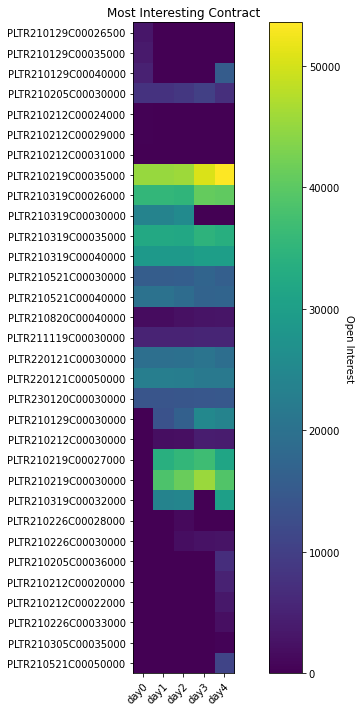

In [92]:
my_heatmap_plotter(dfs1.columns, dfs1.index, dfs1.values, figsize=(10,10))

In [ ]:
# TODO I need a better DataFrame - 3d df that holds days

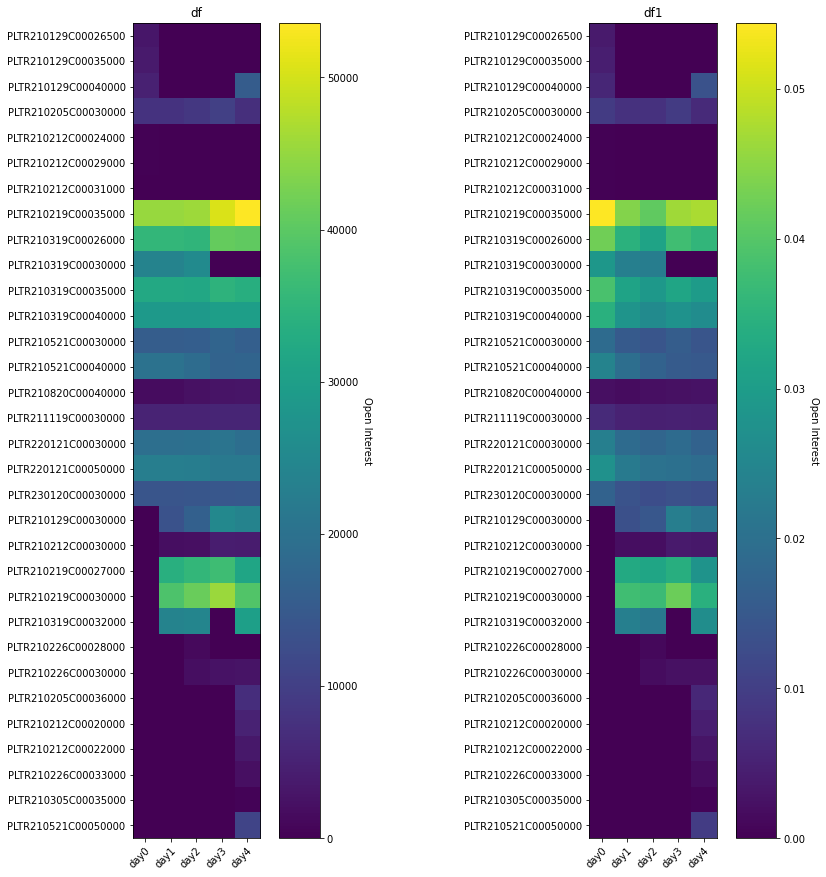

In [42]:
# TODO I need a second heatmap - showin in percentages of 
# all displayed openInterest
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
my_heatmap_plotter(dfs.columns, dfs.index, dfs.values, ax=ax1, title='df')
my_heatmap_plotter(dfs1.columns, dfs1.index, dfs1.values, ax=ax2, title='df1')